In [1]:
!pip install MiniSom


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=bf96baa5fd8f91a4185312028902cbab934825d03913f2f718e495296ba37b08
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from minisom import MiniSom
import numpy as np


In [28]:
# import shutil

# # Source file path
# source_file_path = '/content/drive/MyDrive/Caida 2007/labeled_ddostrace.to-victim.20070804 comb fast.rar'

# # Destination directory path (main directory)
# destination_directory = '/content/'

# # Copy the file
# shutil.copy(source_file_path, destination_directory)


In [4]:
!pip install rarfile

import rarfile

# Path to the RAR file
rar_file_path = '/content/drive/MyDrive/Caida 2007/smallest 2 labeled_ddostrace.to-victim.20070804.rar'

# Destination directory for extraction
extracted_directory = '/content/extracted/'

# Create the destination directory if it doesn't exist
import os
os.makedirs(extracted_directory, exist_ok=True)

# Open the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar:
    # Extract all files to the destination directory
    rar.extractall(extracted_directory)

print(f"Extraction complete. Files are in: {extracted_directory}")


Extraction complete. Files are in: /content/extracted/


In [5]:
import pandas as pd
from minisom import MiniSom
import numpy as np

In [6]:
url = "/content/extracted/labeled_ddostrace.to-victim.20070804.csv"

data = pd.read_csv(url)



<ipython-input-6-480c58c25385>:3: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [7]:
# Print the column types
print(data.dtypes)


Timestamp           object
Source IP           object
Destination IP      object
Protocol            object
Frame Length        object
Port Used           object
Interpacket Time    object
Entropy             object
label                int64
dtype: object


In [8]:
# Convert other columns to appropriate data types
data['Source IP'] = data['Source IP'].astype(str)
data['Destination IP'] = data['Destination IP'].astype(str)
data['Protocol'] = pd.to_numeric(data['Protocol'], errors='coerce') # if it's numeric
data['Frame Length'] = pd.to_numeric(data['Frame Length'], errors='coerce') # if it's numeric
data['Port Used'] = pd.to_numeric(data['Port Used'], errors='coerce') # if it's numeric
data['Interpacket Time'] = pd.to_numeric(data['Interpacket Time'], errors='coerce') # if it's numeric
data['Entropy'] = pd.to_numeric(data['Entropy'], errors='coerce') # if it's numeric
data['label'] = pd.to_numeric(data['label'], errors='coerce') # if it's numeric

In [9]:

# Print the column types
print(data.dtypes)
data

Timestamp            object
Source IP            object
Destination IP       object
Protocol            float64
Frame Length        float64
Port Used           float64
Interpacket Time    float64
Entropy             float64
label                 int64
dtype: object


,Timestamp,Source IP,Destination IP,Protocol,Frame Length,Port Used,Interpacket Time,Entropy,label
0,1186260576.487629,202.1.175.252,71.126.222.64,1.0,28.0,0.0,0.000000,0.0,0
1,1186263576.484935,216.152.107.251,71.126.222.64,1.0,28.0,0.0,0.000000,0.0,1
2,1186260576.489552,192.120.148.227,71.126.222.64,1.0,28.0,0.0,0.001923,0.0,0
3,1186263576.484942,203.42.252.151,71.126.222.64,1.0,28.0,0.0,0.000007,0.0,1
4,1186260576.491812,51.81.166.201,71.126.222.64,1.0,28.0,0.0,0.002260,0.0,0
...,...,...,...,...,...,...,...,...,...
1134547,1186263579.868082,202.99.128.1,71.126.222.64,1.0,28.0,0.0,0.000005,0.0,1
1134548,1186262076.48168,40.75.89.172,71.126.222.64,1.0,28.0,0.0,0.003015,0.0,0
1134549,1186263579.868089,216.121.124.91,71.126.222.64,1.0,28.0,0.0,0.000007,0.0,1
1134550,1186262076.48353,51.81.166.201,71.126.222.64,1.0,28.0,0.0,0.001850,0.0,0


In [10]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [11]:
data

,Timestamp,Source IP,Destination IP,Protocol,Frame Length,Port Used,Interpacket Time,Entropy,label
0,1186260576.487629,202.1.175.252,71.126.222.64,1.0,28.0,0.0,0.000000,0.0,0
1,1186263576.484935,216.152.107.251,71.126.222.64,1.0,28.0,0.0,0.000000,0.0,1
2,1186260576.489552,192.120.148.227,71.126.222.64,1.0,28.0,0.0,0.001923,0.0,0
3,1186263576.484942,203.42.252.151,71.126.222.64,1.0,28.0,0.0,0.000007,0.0,1
4,1186260576.491812,51.81.166.201,71.126.222.64,1.0,28.0,0.0,0.002260,0.0,0
...,...,...,...,...,...,...,...,...,...
1134547,1186263579.868082,202.99.128.1,71.126.222.64,1.0,28.0,0.0,0.000005,0.0,1
1134548,1186262076.48168,40.75.89.172,71.126.222.64,1.0,28.0,0.0,0.003015,0.0,0
1134549,1186263579.868089,216.121.124.91,71.126.222.64,1.0,28.0,0.0,0.000007,0.0,1
1134550,1186262076.48353,51.81.166.201,71.126.222.64,1.0,28.0,0.0,0.001850,0.0,0


In [12]:
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Running on CPU.")

# Load the dataset
data = pd.read_csv("/content/extracted/labeled_ddostrace.to-victim.20070804.csv")

# Convert other columns to appropriate data types
data['Source IP'] = data['Source IP'].astype(str)
data['Destination IP'] = data['Destination IP'].astype(str)
data['Protocol'] = pd.to_numeric(data['Protocol'], errors='coerce') # if it's numeric
data['Frame Length'] = pd.to_numeric(data['Frame Length'], errors='coerce') # if it's numeric
data['Port Used'] = pd.to_numeric(data['Port Used'], errors='coerce') # if it's numeric
data['Interpacket Time'] = pd.to_numeric(data['Interpacket Time'], errors='coerce') # if it's numeric
data['Entropy'] = pd.to_numeric(data['Entropy'], errors='coerce') # if it's numeric
data['label'] = pd.to_numeric(data['label'], errors='coerce') # if it's numeric

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and labels
X = data.drop(['label', 'Timestamp', 'Source IP', 'Destination IP'], axis=1).values
y = data['label'].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define SOM parameters
som_grid_rows = 10
som_grid_columns = 10
input_len = X_scaled.shape[1]
num_iterations = 10000

# Initialize SOM weights on GPU
with tf.device('/GPU:0'):
    som_weights = tf.Variable(tf.random.normal([som_grid_rows * som_grid_columns, input_len]))

# Train SOM on GPU
for i in range(num_iterations):
    percent_complete = (i + 1) / num_iterations * 100
    if (i + 1) % 1000 == 0:
        print(f"Training SOM: {percent_complete:.2f}% complete")

    # Choose a random input vector
    input_vector = X_scaled[np.random.randint(0, len(X_scaled))]

    # Find the best matching unit (BMU) on GPU
    with tf.device('/GPU:0'):
        bmu_index = tf.argmin(tf.norm(som_weights - input_vector, axis=1))

    # Update SOM weights on GPU
    learning_rate = 0.5 * (1 - i / num_iterations)
    with tf.device('/GPU:0'):
        som_weights = som_weights + learning_rate * tf.reshape(tf.subtract(input_vector, som_weights), [som_grid_rows * som_grid_columns, input_len])

print("Training SOM: 100.00% complete")

# Find the winning neurons for each sample
winning_neurons = np.array([tf.argmin(tf.norm(som_weights - x, axis=1)).numpy() for x in X_scaled])

# Assign labels to clusters based on the majority label of the samples in each cluster
cluster_labels = []
total_samples = len(winning_neurons)

for i, neuron in enumerate(winning_neurons):
    cluster_samples_indices = np.where(winning_neurons == neuron)[0]
    cluster_labels.append(y[cluster_samples_indices].mean())

    # Print progress
    if (i + 1) % 1000 == 0 or i + 1 == total_samples:
        percent_complete = (i + 1) / total_samples * 100
        print(f"Assigning cluster labels: {percent_complete:.2f}% complete")

# Evaluate accuracy
accuracy = accuracy_score(y, cluster_labels)
print("Accuracy:", accuracy)


No GPU found. Running on CPU.


<ipython-input-13-5c073b302ff9>:14: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/extracted/labeled_ddostrace.to-victim.20070804.csv")


Training SOM: 10.00% complete
Training SOM: 20.00% complete
Training SOM: 30.00% complete
Training SOM: 40.00% complete
Training SOM: 50.00% complete
Training SOM: 60.00% complete
Training SOM: 70.00% complete
Training SOM: 80.00% complete
Training SOM: 90.00% complete
Training SOM: 100.00% complete
Training SOM: 100.00% complete
Assigning cluster labels: 0.09% complete
Assigning cluster labels: 0.18% complete
Assigning cluster labels: 0.26% complete
Assigning cluster labels: 0.35% complete
Assigning cluster labels: 0.44% complete
Assigning cluster labels: 0.53% complete
Assigning cluster labels: 0.62% complete
Assigning cluster labels: 0.71% complete
Assigning cluster labels: 0.79% complete
Assigning cluster labels: 0.88% complete
Assigning cluster labels: 0.97% complete
Assigning cluster labels: 1.06% complete
Assigning cluster labels: 1.15% complete
Assigning cluster labels: 1.23% complete
Assigning cluster labels: 1.32% complete
Assigning cluster labels: 1.41% complete
Assigning cl

In [53]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/extracted/labeled_ddostrace.to-victim.20070804.csv")

# Convert other columns to appropriate data types
data['Source IP'] = data['Source IP'].astype(str)
data['Destination IP'] = data['Destination IP'].astype(str)
data['Protocol'] = pd.to_numeric(data['Protocol'], errors='coerce') # if it's numeric
data['Frame Length'] = pd.to_numeric(data['Frame Length'], errors='coerce') # if it's numeric
data['Port Used'] = pd.to_numeric(data['Port Used'], errors='coerce') # if it's numeric
data['Interpacket Time'] = pd.to_numeric(data['Interpacket Time'], errors='coerce') # if it's numeric
data['Entropy'] = pd.to_numeric(data['Entropy'], errors='coerce') # if it's numeric
data['label'] = pd.to_numeric(data['label'], errors='coerce') # if it's numeric

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and labels
X = data.drop(['label', 'Timestamp', 'Source IP', 'Destination IP'], axis=1).values
y = data['label'].values



<ipython-input-53-951ecfc34b67>:8: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/extracted/labeled_ddostrace.to-victim.20070804.csv")


KeyboardInterrupt: 

In [ ]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define SOM parameters
som_grid_rows = 10
som_grid_columns = 10
input_len = X_scaled.shape[1]

# Train SOM
som = MiniSom(som_grid_rows, som_grid_columns, input_len, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_batch(X_scaled, 10000)

# Find the winning neurons for each sample
winning_neurons = np.array([som.winner(x) for x in X_scaled])

# Assign labels to clusters based on the majority label of the samples in each cluster
cluster_labels = []
for i in range(len(winning_neurons)):
    cluster_labels.append(y[np.where((winning_neurons[:, 0] == winning_neurons[i, 0]) & (winning_neurons[:, 1] == winning_neurons[i, 1]))].mean())

# Evaluate accuracy
accuracy = accuracy_score(y, cluster_labels)
print("Accuracy:", accuracy)


In [42]:
# Define the SOM parameters
som_rows = 10
som_cols = 10
input_len = X_train.shape[1]

# Initialize the SOM
som = MiniSom(som_rows, som_cols, input_len, sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train_batch(X_train, 10000)

# Get the winning neurons for each data point
# Get the winning neuron for each data point in the training set
train_winners = [som.winner(x) for x in X_train]

# winners = som.winner(X_train)


ValueError: operands could not be broadcast together with shapes (907638,5) (10,10,5) 

In [44]:
# Get the predicted clusters for training and testing data
train_clusters = [som.winner(x) for x in X_train]
test_clusters = [som.winner(x) for x in X_test]

# Flatten the clusters
train_flat_clusters = [x[0] * som_cols + x[1] for x in train_clusters]
test_flat_clusters = [x[0] * som_cols + x[1] for x in test_clusters]

# Get the most frequent cluster for each class
class_clusters = {}
for label in y_train.unique():
    class_clusters[label] = pd.Series([train_flat_clusters[i] for i in range(len(train_flat_clusters)) if y_train.iloc[i] == label]).mode().iloc[0]

import numpy as np

# Predict the labels for training and testing data based on the most frequent cluster for each class
y_train_pred = [k for k, v in class_clusters.items() if np.array_equal(v, train_flat_clusters)]
y_test_pred = [k for k, v in class_clusters.items() if np.array_equal(v, test_flat_clusters)]

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)



ValueError: Found input variables with inconsistent numbers of samples: [907638, 0]

In [11]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with appropriate columns
# For example, if you have columns 'x' and 'y':
# data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 20, 25, 30]})

# Plotting a line chart
plt.plot(data['x'], data['y'])

# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot of Data')

# Display the plot
plt.show()


KeyError: 'x'

           Timestamp        Source IP Destination IP  Protocol  Frame Length  \
0  1186260576.487629    202.1.175.252  71.126.222.64       1.0          28.0   
1  1186263576.484935  216.152.107.251  71.126.222.64       1.0          28.0   
2  1186260576.489552  192.120.148.227  71.126.222.64       1.0          28.0   
3  1186263576.484942   203.42.252.151  71.126.222.64       1.0          28.0   
4  1186260576.491812    51.81.166.201  71.126.222.64       1.0          28.0   

   Port Used  Interpacket Time  Entropy  label  
0        0.0          0.000000      0.0      0  
1        0.0          0.000000      0.0      1  
2        0.0          0.001923      0.0      0  
3        0.0          0.000007      0.0      1  
4        0.0          0.002260      0.0      0  
   Frame Length  Port Used  Interpacket Time  Entropy
0           0.0        0.0          0.000000      0.0
1           0.0        0.0          0.000000      0.0
2           0.0        0.0          0.082099      0.0
3        

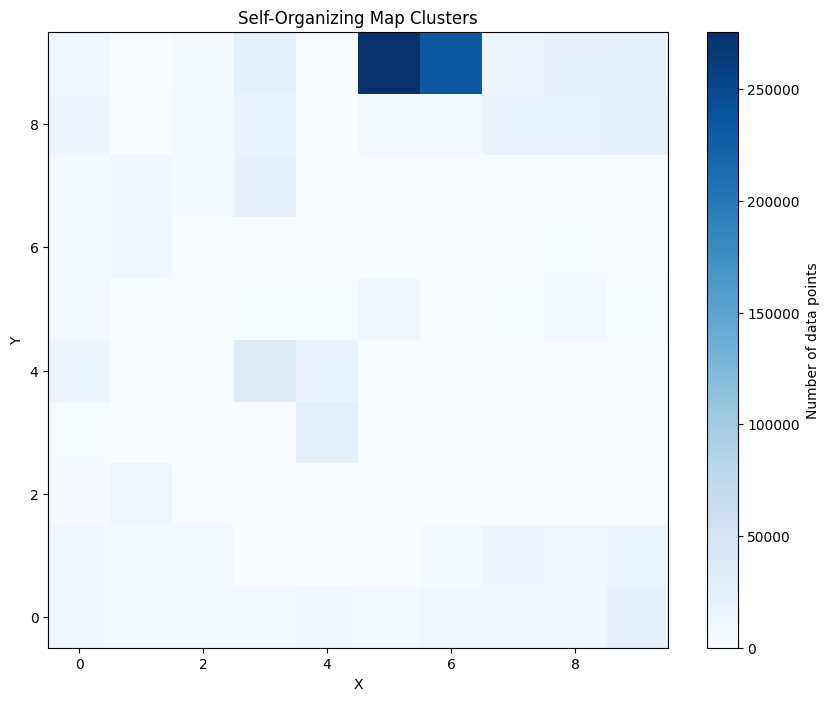

In [12]:
# Display the first few rows of the dataset
print(data.head())
from sklearn.preprocessing import MinMaxScaler

# Drop Timestamp column
data = data.drop(columns=['Timestamp'])

# Normalize numerical features
scaler = MinMaxScaler()
data[['Frame Length', 'Port Used', 'Interpacket Time', 'Entropy']] = scaler.fit_transform(data[['Frame Length', 'Port Used', 'Interpacket Time', 'Entropy']])
data = data[['Frame Length', 'Port Used', 'Interpacket Time', 'Entropy']]
# Display the updated dataset
print(data.head())


from minisom import MiniSom

# Define SOM parameters (you may need to adjust these based on your data)
grid_size = (10, 10)  # Size of the SOM grid
input_len = len(data.columns)  # Number of input features
sigma = 1.0  # Spread of the neighborhood function
learning_rate = 0.5  # Initial learning rate

# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], input_len, sigma=sigma, learning_rate=learning_rate)

print(data.head())
# Initialize weights
som.random_weights_init(data.values)

# Train the SOM
num_iterations = 1000  # Number of iterations
som.train_random(data.values, num_iterations)

# Map each data point to its closest neuron
mapped = som.win_map(data.values)

# Calculate the number of data points in each neuron
cluster_sizes = [len(mapped[(i, j)]) for i in range(grid_size[0]) for j in range(grid_size[1])]
print("Cluster sizes:", cluster_sizes)
import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid for the SOM
xx, yy = np.meshgrid(np.arange(0, grid_size[0]), np.arange(0, grid_size[1]))

# Plot the SOM clusters
plt.figure(figsize=(10, 8))
plt.pcolor(xx, yy, np.array(cluster_sizes).reshape(grid_size[0], grid_size[1]), cmap='Blues')  # You can use any colormap you prefer
plt.colorbar(label='Number of data points')
plt.title('Self-Organizing Map Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()




In [21]:
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
data = pd.read_csv("/content/extracted/labeled_ddostrace.to-victim.20070804.csv")

# Convert other columns to appropriate data types
data['Source IP'] = data['Source IP'].astype(str)
data['Destination IP'] = data['Destination IP'].astype(str)
data['Protocol'] = pd.to_numeric(data['Protocol'], errors='coerce')
data['Frame Length'] = pd.to_numeric(data['Frame Length'], errors='coerce')
data['Port Used'] = pd.to_numeric(data['Port Used'], errors='coerce')
data['Interpacket Time'] = pd.to_numeric(data['Interpacket Time'], errors='coerce')
data['Entropy'] = pd.to_numeric(data['Entropy'], errors='coerce')
data['label'] = pd.to_numeric(data['label'], errors='coerce')

# Drop Timestamp column
data = data.drop(columns=['Timestamp'])

# Normalize numerical features
scaler = MinMaxScaler()
data[['Frame Length', 'Port Used', 'Interpacket Time', 'Entropy']] = scaler.fit_transform(data[['Frame Length', 'Port Used', 'Interpacket Time', 'Entropy']])

# Define SOM parameters
grid_size = (10, 10)  # Size of the SOM grid
input_len = len(data.columns)  # Number of input features
sigma = 1.0  # Spread of the neighborhood function
learning_rate = 0.5  # Initial learning rate

# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], input_len, sigma=sigma, learning_rate=learning_rate)

# Initialize weights
som.random_weights_init(data.values)

# Train the SOM
num_iterations = 1000  # Number of iterations
som.train_random(data.values, num_iterations)

# Map each data point to its closest neuron
mapped = som.win_map(data.values)

# Assign labels to neurons based on majority voting
neuron_labels = []
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        mapped_indices = mapped.get((i, j), [])  # Get mapped indices or empty list if no data points mapped
        mapped_labels = [data.iloc[idx]['label'] for idx in mapped_indices]
        if mapped_labels:
            majority_label = np.bincount(mapped_labels).argmax()  # Majority voting
            neuron_labels.append(majority_label)
        else:
            neuron_labels.append(None)

# Calculate accuracy
predicted_labels = [neuron_labels[i] for i in range(len(neuron_labels)) if neuron_labels[i] is not None]
true_labels = data['label'].tolist()
accuracy = sum(1 for pred, true in zip(predicted_labels, true_labels) if pred == true) / len(true_labels)

print("Accuracy:", accuracy)


<ipython-input-21-83efa8410ec6>:7: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/extracted/labeled_ddostrace.to-victim.20070804.csv")


ValueError: could not convert string to float: '40.48.9.120'